# INFO 3402 – Class 18: Combining data

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT)  

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

import numpy as np
import pandas as pd

pd.options.display.max_columns = 200

import json

Since it's baseball season and there is a long-tradition of collecting statistical data about baseball games, we're going to be using baseball data for the entire tables module.

There are several excellent and distinct sources of baseball data:

* [Retrosheet game logs](http://www.retrosheet.org/gamelogs/index.html)
* [Lahman Database](http://www.seanlahman.com/baseball-archive/statistics/)
* [Baseball-Reference.com](http://www.baseball-reference.com/)

## Lahman database
We will use the Lahman Database to explore how to combine data from different tables together. These files are intended to be separate tables in a database, but we can also load them into memory to explore.

First, the batting table with players' offensive statistics each season.

* **playerID** - Player ID code
* **yearID** - Year
* **stint** - player's stint
* **teamID** - Team
* **lgID** - League
* **G** - Games
* **AB** - At Bats
* **R** - Runs
* **H** - Hits
* **2B** - Doubles
* **3B** - Triples
* **HR** - Homeruns
* **RBI** - Runs Batted In
* **SB** - Stolen Bases
* **CS** - Caught Stealing
* **BB** - Base* on Balls
* **SO** - Strikeouts
* **IBB** - Intentional walks
* **HBP** - Hit by pitch
* **SH** - Sacrifice hits
* **SF** - Sacrifice flies
* **GIDP** - Grounded into double plays

In [22]:
batting_df = pd.read_csv('./Lahman/Batting.csv')
print("There are {0:,} rows.".format(len(batting_df)))
batting_df.head()

There are 105,861 rows.


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


Next, the Master table with players' basic biographical information.

* **playerID** - A unique code asssigned to each player. The playerID links the data in this file with records in the other files.
* **birthYear** - Year player was born
* **birthMonth** - Month player was born
* **birthDay** - Day player was born
* **birthCountry** - Country where player was born
* **birthState** - State where player was born
* **birthCity** - City where player was born
* **deathYear** - Year player died
* **deathMonth** - Month player died
* **deathDay** - Day player died
* **deathCountry** - Country where player died
* **deathState** - State where player died
* **deathCity** - City where player died
* **nameFirst** - Player's first name
* **nameLast** - Player's last name
* **nameGiven** - Player's given name (typically first and middle)
* **weight** - Player's weight in pounds
* **height** - Player's height in inches
* **bats** -  Player's batting hand (left, right, or both)** - throws** - Player's throwing hand (left or right)
* **debut** - Date that player made first major league appearance
* **finalGame** - Date that player made first major league appearance (blank if still active)
* **retroID** - ID used by retrosheet
* **bbrefID** - ID used by Baseball Reference website

In [23]:
# Read in file plus parse the dates
master_df = pd.read_csv('./Lahman/People.csv',parse_dates=['debut','finalGame'])

# Make a new column with the 
master_df['career_length'] = (master_df['finalGame'] - master_df['debut'])/pd.Timedelta(1,'d')

# Print out the number of rows
print("There are {0:,} rows.".format(len(master_df)))

# Inspect
master_df.head()

There are 19,617 rows.


,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,career_length
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,4156.0
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,8209.0
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01,3456.0
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01,4817.0
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01,1676.0


Finally, the "Fielding" table with statistics about players' defensive performance each season.

In [24]:
fielding_df = pd.read_csv('./Lahman/Fielding.csv')
print("There are {0:,} rows.".format(len(fielding_df)))
fielding_df.head()

There are 140,921 rows.


,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
0,abercda01,1871,1,TRO,NaN,SS,1,1.0,24.0,1,3,2.0,0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,2B,22,22.0,606.0,67,72,42.0,5,NaN,NaN,NaN,NaN,NaN
2,addybo01,1871,1,RC1,NaN,SS,3,3.0,96.0,8,14,7.0,0,NaN,NaN,NaN,NaN,NaN
3,allisar01,1871,1,CL1,NaN,2B,2,0.0,18.0,1,4,0.0,0,NaN,NaN,NaN,NaN,NaN
4,allisar01,1871,1,CL1,NaN,OF,29,29.0,729.0,51,3,7.0,1,NaN,NaN,NaN,NaN,NaN


## Basic EDA

In what state have the most players been born? We can see the "birthState" variable includes non-U.S. states as well.

In [6]:
master_df['birthState'].value_counts().head(55)

CA                      2241
PA                      1435
NY                      1225
IL                      1061
OH                      1045
TX                       922
MA                       669
MO                       609
FL                       535
MI                       432
NJ                       431
NC                       407
IN                       380
GA                       363
AL                       333
MD                       313
TN                       307
VA                       294
KY                       288
OK                       265
LA                       253
WI                       245
IA                       221
KS                       212
MS                       207
CT                       207
WA                       201
SC                       192
Distrito Nacional        171
MN                       166
AR                       155
OR                       133
ON                       128
WV                       120
NE            

How many players were born in Colorado?

In [7]:
co_master_df = master_df.query("birthState == 'CO'")
len(co_master_df)

93

How have Colorado natives' representation in MLB changed over time?

Text(0.5, 0, 'Birth year')

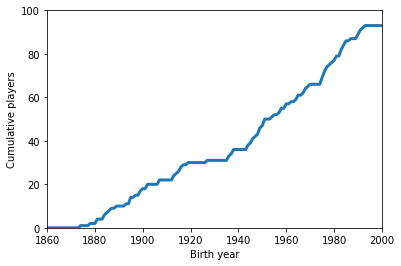

In [8]:
co_annual_counts = co_master_df['birthYear'].value_counts()

co_annual_counts = co_annual_counts.reindex(range(1860,2001), fill_value = 0)

ax = co_annual_counts.cumsum().plot(lw=3)
ax.set_ylim((0,100))
ax.set_ylabel('Cumulative players')
ax.set_xlabel('Birth year')

Make a pivot table with the number of players born per year in each state. Filter to only players born in the U.S. and create a pivot table with "birthYear" as index, "birthState" as columns, and counting the number of playerIDs.

In [10]:
players_born_per_state = pd.pivot_table(data=master_df.query('birthCountry == "USA"'),
                                        index='birthYear',
                                        columns='birthState',
                                        values='playerID',
                                        aggfunc='count',
                                        fill_value=0)

players_born_per_state

birthState,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
birthYear,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1820.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1832.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
1836.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1837.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1838.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1839.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1840.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1841.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1842.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Plot out some of the biggest states player production in the 20th century. The post-World War II boom in California is remarkable, as is the more recent rapid growth in players from Florida.

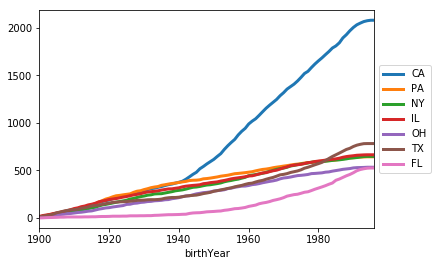

In [11]:
XX_big_states_df = players_born_per_state.loc[1900:,['CA','PA','NY','IL','OH','TX','FL']]
ax = XX_big_states_df.cumsum().plot(lw=3,legend=False)
ax.legend(loc='center left',bbox_to_anchor=(1,.5))

We can also replicate by country.

In [13]:
players_born_per_country = pd.pivot_table(data=master_df,
                                        index='birthYear',
                                        columns='birthCountry',
                                        values='playerID',
                                        aggfunc='count',
                                        fill_value=0)

players_born_per_country

birthCountry,Afghanistan,American Samoa,Aruba,At Sea,Australia,Austria,Bahamas,Belgium,Belize,Brazil,CAN,China,Colombia,Cuba,Curacao,Czech Republic,D.R.,Denmark,Finland,France,Germany,Greece,Guam,Honduras,Hong Kong,Indonesia,Ireland,Italy,Jamaica,Japan,Latvia,Lithuania,Mexico,Netherlands,Nicaragua,Norway,P.R.,Panama,Philippines,Poland,Russia,Saudi Arabia,Singapore,Slovakia,South Africa,South Korea,Spain,Sweden,Switzerland,Taiwan,USA,United Kingdom,V.I.,Venezuela,Viet Nam
birthYear,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1820.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1824.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1832.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0
1835.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1836.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1837.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1838.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0
1839.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1840.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0,0,0


Dominican, Venezuelan, and Puerto Rican players have overtaken Canadian players since the 1940s.

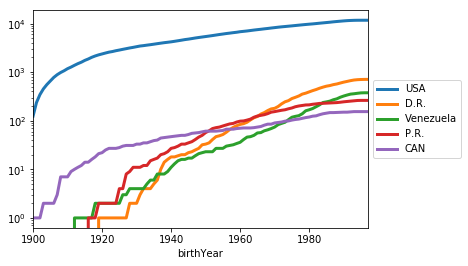

In [14]:
XX_top_birth_countries_df = players_born_per_country.loc[1900:,['USA','D.R.','Venezuela','P.R.','CAN']]

ax = XX_top_birth_countries_df.cumsum().plot(lw=3,legend=False)
ax.legend(loc='center left',bbox_to_anchor=(1,.5))
ax.set_yscale('log')

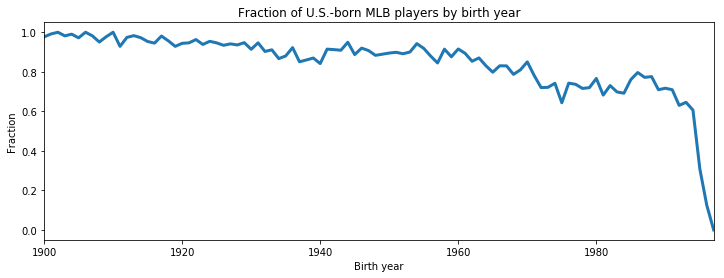

In [15]:
master_df['American'] = master_df['birthCountry'] == "USA"

americans_per_year = pd.pivot_table(data=master_df,
                                    index='birthYear',
                                    columns='American',
                                    values='playerID',
                                    aggfunc='count',
                                    fill_value=0)

_div_df = americans_per_year.div(americans_per_year.sum(1),axis=0)[True]

f,ax = plt.subplots(1,1,figsize = (12,4))
_div_df.loc[1900:].plot(lw=3,ax=ax)
ax.set_xlabel('Birth year')
ax.set_ylabel('Fraction')
ax.set_title('Fraction of U.S.-born MLB players by birth year');

## Join checklist

We want to merge `master_df` and `batting_df`. Before we even attempt a join, look closely at each of these tables.

* **Variables.** What variables do they share in common that could be used as keys in a join?
* **Coverage.** Do both tables cover the same ranges of time?
* **Duplicates.** Are there instances of multiple/repeated rows of these key variables? Why is that?
* **Strategy.** What is the most appropriate merging strategy to handle the different time windows and repeated dates?
* **Shape.** What should the data look like afterwards?  
  * How many rows? 
  * How many columns? 
  * Which values should repeat? 
  * Which values should be null? 
  * Which values should disappear?
  
If you do not have answers for these questions, you are not prepared to evaluate the quality of a join and are likely to make serious errors resulting in duplicated or dropped data.


### Variables?

What variables do the two tables have in common that could be used as keys in a join? The most obvious is the "playerID" variable, which uniquely identifies each player. You do not need the columns to be named identically, but the values need to be similar types in order to join.

In [25]:
set(master_df.columns) & set(batting_df.columns)

{'playerID'}

At a minimum, you should check how these two candidate variables overlap. How many unique values are in each table?

In [26]:
"{:,}".format(len(master_df['playerID'].unique()))

'19,617'

In [27]:
"{:,}".format(len(batting_df['playerID'].unique()))

'19,428'

Use some set operations to determine whether there are items in one that are not in the other. We will need an explanation for why there are more unique values in `master_df` than in `batting_df`. The first hypothesis I have about this mssing data is that there have been 190 MLB players who never bat and they are a combination of mostly American League pitchers and some pinch runners.

In [28]:
in_master_but_not_batting_set = set(master_df['playerID'].unique()) - set(batting_df['playerID'].unique())

in_batting_but_not_master_set = set(batting_df['playerID'].unique()) - set(master_df['playerID'].unique())

print("There are {0:,} \"playerID\"s in master_df but not in batting_df.".format(len(in_master_but_not_batting_set)))
print("There are {0:,} \"playerID\"s in batting_df but not in master_df.".format(len(in_batting_but_not_master_set)))

There are 189 "playerID"s in master_df but not in batting_df.
There are 0 "playerID"s in batting_df but not in master_df.


### Coverage?

Do both tables cover the same range of time? If there is temporal data, do a quick `.min()` and `.max()` to confirm if and how the data overlaps in time. These look to cover similar start and end dates, which is promising.

In [29]:
master_df['debut'].min().year, master_df['debut'].max().year

(1871, 2018)

In [30]:
batting_df['yearID'].min(), batting_df['yearID'].max()

(1871, 2018)

### Duplicates?

How often do important data values repeat? Using "playerID", count up how often it appears in each dataset. The `master_df` has no repeated rows of data (each row is biographical data about an individual player) while the `batting_df` has dozens of repeated rows for some players (each row is batting information about a single player's perfomance on a team that season).

In [31]:
master_df['playerID'].value_counts().head()

chismto01    1
fletcsa01    1
ennsdi01     1
irwinar01    1
zeihehe01    1
Name: playerID, dtype: int64

In [32]:
batting_df['playerID'].value_counts().head()

mcguide01    31
henderi01    29
newsobo01    29
kaatji01     28
johnto01     28
Name: playerID, dtype: int64

### Strategy?

What is the most appropriate merging strategy to handle the different time windows and repeated dates? The `master_df` has fewer rows than `batting_df` because `batting_df` has repeated observations of players across years and teams. We ideally want a DataFrame that preserves the information about each player's season even if it means repeating biographical information. There should be no data that is dropped because of non-overlapping dates. I should expect there to be some missing data since there are more unique "playerID" values in `master_df` than `batting_df` that corresponds to pitchers.

We'll start with left and right joins using `pd.merge`. You will want to pass five arguments to `pd.merge`:

* **left** - the left-hand DataFrame
* **right** - the right-hand DataFrame
* **left_on** - the name of the column containing the values to join on in the left DataFrame
* **right_on** - the name of the column containing the values to join on in the right DataFrame
* **how** - options include "left", "right", "inner" and "outer" - this is what we'll focus on for now!

When we call `how='left'` in `pd.merge`, we make sure all the keys we're joining on that are present in the "left" DataFrame remain in the merged DataFrame. A left-join is ideal if you really trust and want to preserve all the data in your left DataFrame, even if it means losing data in your right DataFrame.

When we call `how='right'` in `pd.merge`, we make sure all the keys we're joining on that are present in the "right" DataFrame remain in the merged DataFrame. A right-join is ideal if you really trust and want to preserve all the data in your right DataFrame, even if it means losing data in your left DataFrame.

![From W3 Schools](https://www.w3schools.com/sql/img_rightjoin.gif)

This all suggests a few different strategies: 

1. A **left join** would preserve all the batting information while dropping information about non-batting pitches.
2. A **right join** would preserve all the biographical information (batting pitchers included) but would only keep one row of batting data.
3. An **outer join** that preserves all the information about both biographical (`master_df`) and batting information. This data will have missing batting values for the players who lack batting information but should not have missing biographical infromation.
4. An **inner join** will preserve all the information common to `master_df` and `batting_df` and exclude the rest. This would mean a smaller dataset for just the batters, no biographical data about non-batting pitchers, and no missing data.

![From W3 Schools](https://www.w3schools.com/sql/img_leftjoin.gif)

![From W3 Schools](https://www.w3schools.com/sql/img_innerjoin.gif)

![From W3 Schools](https://www.w3schools.com/sql/img_outerjoin.gif)

I think a left-join is the best strategy for producing a dataset with the smallest amount of missing values.

### Shape?

What should the data look like afterwards? How many rows? How many columns? Which values should repeat? Which values should be null? Which values should disappear? 

Left-joining the smaller `master_df` onto the larger `batting_df` 

In [33]:
"There are {0:,} rows in \"batting_df\" and {1:,} rows in \"master_df\"".format(len(batting_df),len(master_df))

'There are 105,861 rows in "batting_df" and 19,617 rows in "master_df"'

In [34]:
"There are {0:,} columns in \"batting_df\" and {1:,} columns in \"master_df\"".format(len(batting_df.columns),len(master_df.columns))

'There are 22 columns in "batting_df" and 25 columns in "master_df"'

A left-join should have 105,861 rows of data and 22 + 25 - 1 = 46 columns of data. The "playerID" values should repeat for the different years and teams, but should only have 18,915 unique values. There should be no missing data since there are no values in `batting_df` that are not in `master_df`. Nothing should disappear because both tables cover the same range of time.

In [35]:
batting_master_left_df = pd.merge(left = batting_df, right = master_df,
                                  left_on = 'playerID', right_on = 'playerID',
                                  how='left')

Test for shape. The number of rows should be the same as `batting_df` and the number of columns should be the sum of their current columns minus the number of columns we asked to overlap.

In [36]:
print("There are {0:,} rows and {1:,} columns.".format(*batting_master_left_df.shape))

There are 105,861 rows and 46 columns.


Test for unique values. There's no non-batting pitchers in there, hence the smaller the value than the complete dataset.

In [37]:
print("There are {:,} unique values.".format(len(batting_master_left_df['playerID'].unique())))

There are 19,428 unique values.


Test for coverage. The coverage in years should be identical.

In [38]:
batting_master_left_df['yearID'].min(), batting_master_left_df['yearID'].max()

(1871, 2018)

In [39]:
batting_master_left_df['debut'].min().year, batting_master_left_df['debut'].max().year

(1871, 2018)

Test for duplicates. The distributions of counts for "playerID" should be identical.

In [40]:
batting_master_left_df['playerID'].value_counts().head()

mcguide01    31
henderi01    29
newsobo01    29
kaatji01     28
johnto01     28
Name: playerID, dtype: int64

In [41]:
batting_df['playerID'].value_counts().head()

mcguide01    31
henderi01    29
newsobo01    29
kaatji01     28
johnto01     28
Name: playerID, dtype: int64

Repeat for demonstration purposes with a right join.

In [42]:
batting_master_right_df = pd.merge(left = batting_df, right = master_df,
                                  left_on = 'playerID', right_on = 'playerID',
                                  how='right')

print("There are {0:,} rows and {1:,} columns.".format(*batting_master_right_df.shape))
print("There are {:,} unique values for \"playerID\" in the outer join.".format(len(batting_master_right_df['playerID'].unique())))


There are 106,050 rows and 46 columns.
There are 19,617 unique values for "playerID" in the outer join.


## Inner and outer joins

When we call `how='inner'` in `pd.merge`, we make sure only the keys that are present in ***both*** the "right" and "left" DataFrame remain in the merged DataFrame. An inner join is ideal when you want to minimize the amount of missing data present by only including the data present in the left and right DataFrames. An outer join is ideal when you don't want to lose any data.

![From W3 Schools](https://www.w3schools.com/sql/img_innerjoin.gif)

In [43]:
batting_master_inner_df = pd.merge(left = batting_df, right = master_df,
                                  left_on = 'playerID', right_on = 'playerID',
                                  how='inner')

print("There are {0:,} rows and {1:,} columns.".format(*batting_master_inner_df.shape))
print("There are {:,} unique values for \"playerID\" in the inner join.".format(len(batting_master_inner_df['playerID'].unique())))


There are 105,861 rows and 46 columns.
There are 19,428 unique values for "playerID" in the inner join.


In [44]:
batting_master_outer_df = pd.merge(left = batting_df, right = master_df,
                                  left_on = 'playerID', right_on = 'playerID',
                                  how='outer')

print("There are {0:,} rows and {1:,} columns.".format(*batting_master_outer_df.shape))
print("There are {:,} unique values for \"playerID\" in the outer join.".format(len(batting_master_outer_df['playerID'].unique())))


There are 106,050 rows and 46 columns.
There are 19,617 unique values for "playerID" in the outer join.


## EDA with different joins of data

Which country produces the best-performing batters?

/Users/briankeegan/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


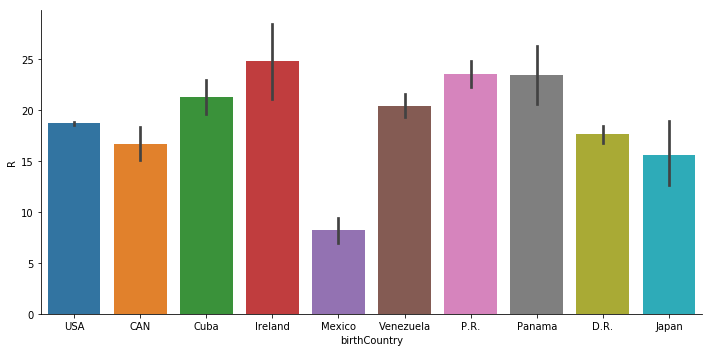

In [45]:
top_birth_countries = batting_master_left_df['birthCountry'].value_counts().head(10).index.tolist()

sb.catplot(x = 'birthCountry',y = 'R', # hue='bats',
           data = batting_master_left_df[batting_master_left_df['birthCountry'].isin(top_birth_countries)],
           kind = 'bar', aspect=2)

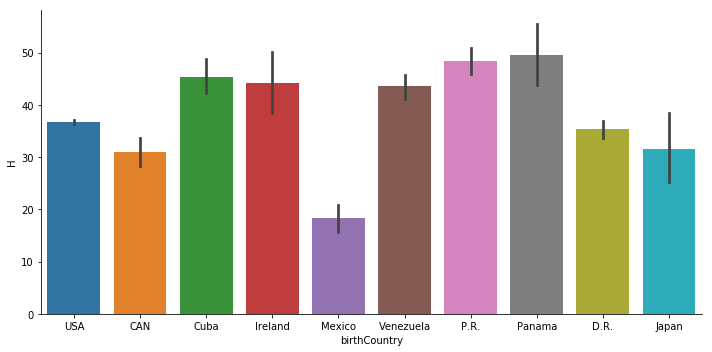

In [46]:
top_birth_countries = batting_master_left_df['birthCountry'].value_counts().head(10).index.tolist()

sb.catplot(x = 'birthCountry',y = 'H', # hue='bats',
           data = batting_master_left_df[batting_master_left_df['birthCountry'].isin(top_birth_countries)],
           kind = 'bar', aspect=2)

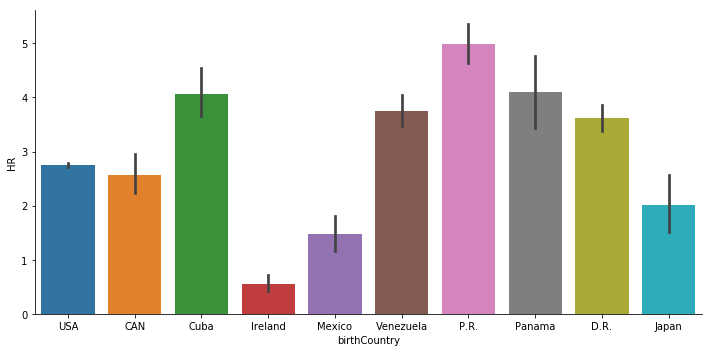

In [47]:
top_birth_countries = batting_master_left_df['birthCountry'].value_counts().head(10).index.tolist()

sb.catplot(x = 'birthCountry',y = 'HR', # hue='bats',
           data = batting_master_left_df[batting_master_left_df['birthCountry'].isin(top_birth_countries)],
           kind = 'bar', aspect=2)

Based on our joining strategy, what is biased about the following plots?

In [51]:
batting_master_left_df.sort_values(['playerID','yearID']).head(20)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,career_length
84655,aardsda01,2004,1,SFN,NL,11,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,4156.0
87331,aardsda01,2006,1,CHN,NL,45,2,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,4156.0
88708,aardsda01,2007,1,CHA,AL,25,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,4156.0
90093,aardsda01,2008,1,BOS,AL,47,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,4156.0
91478,aardsda01,2009,1,SEA,AL,73,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,4156.0
92866,aardsda01,2010,1,SEA,AL,53,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,4156.0
95611,aardsda01,2012,1,NYA,AL,1,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,4156.0
97019,aardsda01,2013,1,NYN,NL,43,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,4156.0
99863,aardsda01,2015,1,ATL,NL,33,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,4156.0
36888,aaronha01,1954,1,ML1,NL,122,468,58,131,27,6,13,69.0,2.0,2.0,28,39.0,NaN,3.0,6.0,4.0,13.0,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,8209.0


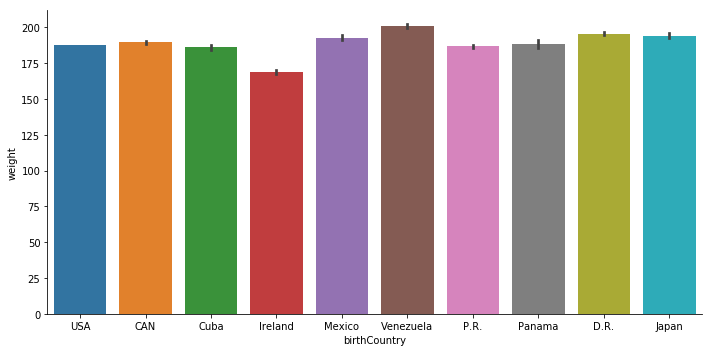

In [48]:
sb.catplot(x = 'birthCountry',y = 'weight', # hue='bats',
           data = batting_master_left_df[batting_master_left_df['birthCountry'].isin(top_birth_countries)],
           kind = 'bar', aspect=2)

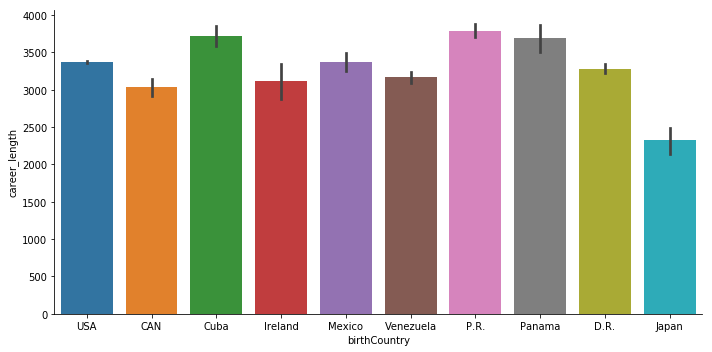

In [49]:
sb.catplot(x = 'birthCountry',y = 'career_length', # hue='bats',
           data = batting_master_left_df[batting_master_left_df['birthCountry'].isin(top_birth_countries)],
           kind = 'bar', aspect=2)

What are strategies for cleaning this data to remove the bias(es) in the joined data?

## Exercise: A three-way join

Which schools produce the highest-paid players? We will need to combine *three* different tables to answer this question.

In [52]:
salaries_df = pd.read_csv('./Lahman/Salaries.csv')
print("There are {0:,} rows.".format(len(salaries_df)))
salaries_df.head()

There are 26,428 rows.


,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [53]:
schools_df = pd.read_csv('./Lahman/Schools.csv')
print("There are {0:,} rows.".format(len(schools_df)))
schools_df.head()

There are 1,207 rows.


,schoolID,name_full,city,state,country
0,abilchrist,Abilene Christian University,Abilene,TX,USA
1,adelphi,Adelphi University,Garden City,NY,USA
2,adrianmi,Adrian College,Adrian,MI,USA
3,akron,University of Akron,Akron,OH,USA
4,alabama,University of Alabama,Tuscaloosa,AL,USA


In [54]:
college_playing_df = pd.read_csv('./Lahman/CollegePlaying.csv')
print("There are {0:,} rows.".format(len(college_playing_df)))
college_playing_df.head()

There are 17,350 rows.


,playerID,schoolID,yearID
0,aardsda01,pennst,2001
1,aardsda01,rice,2002
2,aardsda01,rice,2003
3,abadan01,gamiddl,1992
4,abadan01,gamiddl,1993


First, we will join `college_playing_df` with `salaries_df` into `college_salaries_df`. Variables? Coverage? Duplicates? Strategy? Shape?

In [61]:
college_salaries_df = pd.merge(left = college_playing_df,
                               right = salaries_df,
                               left_on = 'playerID',
                               right_on = 'playerID',
                               how = 'inner')

print("There are {0:,} rows.".format(len(college_salaries_df)))

There are 38,417 rows.


Second, join `college_salaries_df` with `schools_df` into `college_salaries_names_df`. Variables? Coverage? Duplicates? Strategy? Shape?

In [ ]:
college_salaries_names_df = pd.merge(left = college_salaries_df,
                                     right = schools_df,
                                     left_on = '',
                                     right_on = '',
                                     how = '')

print("There are {0:,} rows.".format(len(college_salaries_names_df)))

Using `college_salaries_names_df`, make a pivot table with "name_full" as an index and the mean "salary" as values. Sort the table. Which schools have the highest average salary? What is surprising here? Why might these be unusual or biased? How could you address these biases?

Using `college_salaries_names_df`, make a seaborn `catplot` or `pointplot` with "yearID" on the x-axis, "salary" on the y-axis, and hued by top programs' salaries. Note, you will probably want to filter the DataFrame down to only the top 5–10 programs.